# Проверка гипотез для увеличения выручки крупного интернет-магазина.

**Описание проекта:**
Крупный интернет-магазин планирует проверить список гипотез для увеличения выручки. Список подготовлен совместно с отделом маркетинга.

**Наша задача:** 
- Приоритизировать гипотезы,
- Запустить A/B-тест,
- Проанализировать результаты.

**Ход исследования:** 
1. Загрузим и ознакомимся с данными
2. Проведём предобработку
3. Сделаем приоритезацию гипотез
4. Проведём подготовку к проведению А/В теста
5. Проведём анализ А/В
6. Напишем выводы и рекомендации

## Загрузим данные и подготовим их к анализу

Данные находятся в 3-ёх файлах.

- описание гипотез: `hypothesis.csv`.
- заказы: `orders.csv`.
- визиты посетителей: `visitors.csv`.

Изучим данные и выполним предобработку. 

In [4]:
# библиотека Pandas
import pandas as pd

# библиотеки математических вычислений
import numpy as np
import datetime as dt
import scipy.stats as stats

# библиотеки визуализации данных
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# палитры графиков для людей со всеми типами зрения
sns.set_palette('colorblind') 
sns.set_style('whitegrid')   

### Загрузка данных
Загрузим файл и посмотрим информацию, которую содержит датасет.

In [200]:
# ограничение на показ 2 знаков после запятой и расширим вывод ячеек
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 130

# загрузим данные трёх датасетов:
try:
    hypothesis = pd.read_csv('/Users/stavrovalexander/Yandex_practicum/datasets/hypothesis.csv')
    orders = pd.read_csv('/Users/stavrovalexander/Yandex_practicum/datasets/orders.csv')
    visitors = pd.read_csv('/Users/stavrovalexander/Yandex_practicum/datasets/visitors.csv')
except:
    display('Ошибка данных')

### Посмотрим информацию, которую содержит каждый датасет: 

#### Информация о гипотезах

In [8]:
display(hypothesis, hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


None

Посмотрим на структуру датасета `hypothesis`:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

1. Таблица содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
2. Убедились, что все параметры оценены по 10-ти бальным шкалам.
3. В таблице нет пропусков.
4. Для удобства преименуем названия столбцов на следующем шаге. Приведём их к строчным буквам.

#### Информация о заказах

In [11]:
display(orders.head(),orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None

Структура датасета `orders`:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

1. Таблица содержит 1 197 строк с информацияей о заказах в интернет-магазине
2. В таблице нет пропусков.
3. Изменим тип данных в столбце `date`.

In [207]:
# посмотрим какая минимальная и максимальная дата создания заказов
min_date = orders['date'].min()
max_date = orders['date'].max()

print('Дата создания первого заказа:',min_date)
print('Дата создания последнего заказа:',max_date)

# проверим уникальность 1 197 строк заказов
print('\nКоличество уникальных заказов:', orders['transactionId'].nunique())
# посмотрим сколько пользователей сделали заказы
print('Количество уникальных пользователей:', orders['visitorId'].nunique())

Дата создания первого заказа: 2019-08-01
Дата создания последнего заказа: 2019-08-31

Количество уникальных заказов: 1197
Количество уникальных пользователей: 1031


4. Работать будем с заказами, созданными в августе 2019 года.
5. Заказы уникальные и не содержат повторов. Так как 1 197 строк датасета содержат 1 197 уникальных ID транзакций
6. Создали эти заказы 1 031 уникальных пользователя.

#### Информация о визитах пользователей

In [16]:
display(visitors.head(),visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

Структура датасета `visitors`:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

1. Таблица содержит 62 строки с информацией о трафике в дни теста. (31 строка с трафиком группы A и 31 строка с трафиком группы В.)
2. В таблице нет пропусков.
3. На этапе предобработки изменим тип данных в столбце `date`.

In [18]:
# посмотрим какая минимальная и максимальная дата визитов
min_date_v = visitors['date'].min()
max_date_v = visitors['date'].max()

print('Дата первого визита:',min_date)
print('Дата последнего визита:',max_date)

Дата первого визита: 2019-08-01
Дата последнего визита: 2019-08-31


4. Визиты пользователей совершены в тот же период августа 2019 года. 
5. Даты визитов и даты создания заказов совпадают. Это значит, что по датам проведения A/В теста у нас всё корректно.

### Проведём предобработку данных: 

In [21]:
# переименуем названия столбцов в датасете с гипотезами:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.head(3))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


In [22]:
# приведём столбцы, содержащие даты, к корректному типу данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [23]:
# посчитаем количество явных дубликатов во всех трёх датафреймах:
display(hypothesis.duplicated().sum(),
        orders.duplicated().sum(),
        visitors.duplicated().sum())

0

0

0

### Вывод первого этапа: 

1. Загрузили и изучили все 3 датафрейма с данными о гипотезах, заказах и взитах пользователей. 
2. Все заказы и визиты совершены в период с 1 по 31 августа 2019 года. Даты совпадают.
3. Мы переименовали названия столбцов в датафрейме с гипотезами и изменили типы данных в некоторых столбцах.
4. Пропуски во всех 3 датафреймах отсутствуют.
5. Таблица с заказами содержит 1 197 уникальных строк с информацией о заказах, созданных 1 031 уникальным  пользователем. 

Можем перейти к следующему этапу приоритизации гипотез. 

___

## Приоритизация гипотез.

Как мы знаем, датафрейм `hypothesis` содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. Применим два метода для выделения приортитетных гипотез.


### Применим фреймворк ICE для приоритизации гипотез. 

In [26]:
# добавим в таблицу столбец с расчётным значением ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])

# отсортируем гипотезы по убыванию приоритета
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(1))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.30
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.30
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.10
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6.**
- 8. Запустить акцию, дающую скидку на товар в день рождения;
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Фреймворк RICE для приоритизации гипотез. 

In [28]:
# добавим в таблицу столбец с расчётным значением RICE
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] *
                      hypothesis['reach'] / hypothesis['efforts'])

# отсортируем гипотезы по убыванию приоритета
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6.**

- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Вывод по наиболее перспективным гипотезам:
- По ICE гипотеза 8 (Запустить акцию в день рождения) получила высокий приоритет за счёт двух высоких значений Impact (Влияние) и Confidence (Уверенность). Действительно, скидки на товар в день рождения могут сильно повлиять на принятие решения пользователем о покупке. И компания оценила высоко уровень уверенности в этой гипотезе. Но охват пользователей у неё самый низкий. Мы не можем проводить тест гипотезы весь год, чтобы все пользователи успели воспользоваться скидкой в свой день рождения.


- На первом и втором месте по RICE гипотезы под номерами 7 и 2. Это произошло, потому что у них высокое значение параметра Reach (Охват) — 10 и 8 баллов соответственно. То есть, проведение проверки этой гипотезы затронет большое число пользователей. Большинство посетителей увидят и форму подписки на страницах и блоки с рекомендациями товаров.


- У гипотезы номер 3 по RICE тоже высокая оценка параметра Reach. Но оценка затрат на реализацию проверки этой гипотезы слишком высокая. Effort (Затраты) - 8. Изменять структуру категорий интернет-магазина дольше и затратнее, чем добавить на сайт формы подписки или блоки с рекомендациями.


- Пересечением обеих методов являются гипотезы 7, 0, 6
  - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
  - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
  - 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
---

## Подготовка к проведению A/B-теста.

Прежде чем проводить A/B-тест необходимо убедиться, что группы А и В корректно подобраны, то есть:
- генеральная совокупность не содержит аномалий и выбросов;
- инструмент «деления» трафика отработал безошибочно;
- данные поступали в систему аналитики корректно.

Обычно, для таких целей проводят А/А тест. Предполагаем, что А/А теста прошёл успешно и проверим его критерии.

Критерии успешного A/A-теста:
- Количество пользователей, попавших в различные группы, отличается не более, чем на 1%;
- Данные во всех группах отправляются в системы аналитики одинаково;
- Различие ключевых метрик по группам не более 1% и не имеет статистической значимости;
- Каждый посетитель, попавший в одну из групп теста, остаётся в этой группе до конца теста.

### Проверим количество пользователей, попавших в группу А и В на первом этапе воронки.

Первый этап воронки — это входящий трафик. Посмотрим равномерно ли распределился трафик между группами.

In [32]:
# посчитаем количество визитов пользователей в группах А и В
visitorsA = visitors[visitors['group']=='A']['visitors'].sum()
visitorsB = visitors[visitors['group']=='B']['visitors'].sum()

print('Кол-во визитов пользователей в группе А: {}'.format(visitorsA))
print('Кол-во визитов пользователей в группе B: {}'.format(visitorsB))

print(f'\nОтличие в количестве визитов пользователей А/В: {round(visitorsA / visitorsB, 2)} %')

Кол-во визитов пользователей в группе А: 18736
Кол-во визитов пользователей в группе B: 18916

Отличие в количестве визитов пользователей А/В: 0.99 %


Количество пользователей, попавших в различные группы, отличается не более, чем на 1%. То есть, трафик распределялся равномерно.

Для более качественной оценки репрезентативности деления трафика можно проверять равномерность деления пользователей внутри других параметров. Например:
- регион нахождения пользователя,
- тип устройства, 
- тип браузера и тд

Таких данных у нас нет и мы принимаем, что с критерием репрезентативности деления трафика всё отлично.

### Проверим есть ли различия между группами А/В на втором этапе воронки.

В воронке продаж нашего интернет магазина следующий этап после визита — это оформление заказа.

Мы выяснили, что трафик разделили равномерно. Посмоторим как разделились заказы между пользователями.

In [35]:
# сделаем срезы по группам А/В в разрезе пользователей в таблице заказов
ordersA = set(orders[(orders['group'] == 'A')]['visitorId'])
ordersВ = set(orders[(orders['group'] == 'B')]['visitorId'])

print('Количество уникальных пользователей с заказами в группе A:', len(ordersA))
print('Количество уникальных пользователей с заказами в группе В:', len(ordersВ))

Количество уникальных пользователей с заказами в группе A: 503
Количество уникальных пользователей с заказами в группе В: 586


Всего 1 089 уникальных пользователей. Что-то не сходится. Из этапа знакомства с данными мы знаем, что у нас 1031 уникальный пользователей. 58 пользователей откуда-то появились.

Это говорит о том, что в группах есть пересечения. Один и тот же пользователь попал и в группу A и В и посчитался два раза.


In [37]:
# проверим это пересечение пользователей
ordersAB = set(ordersA) & set(ordersВ)

print('Количество заказов с пересечениям по ID пользователя:', len(ordersAB))

Количество заказов с пересечениям по ID пользователя: 58



Да. Получилось так, что пользователи с уникальными ID попали и в заказы группы А и заказы группы В

Здесь мы нарушаем критерий успешного теста, когда каждый посетитель, попавший в одну из групп теста, остаётся в этой группе до конца теста. Посмотрим, долю этих пользователей.

In [39]:
all_orders = orders['visitorId'].nunique()

print(f'Доля пересечения уникальных пользователей в группах А/В:, {round((len(ordersAB) / all_orders)*100, 2)} %')

Доля пересечения уникальных пользователей в группах А/В:, 5.63 %


- Доля пересечения таких пользователей 5,6%. 
- Почему они попали в обе группы не ясно. Или ошибка в механизме сплитования или они по какой-то причине действительно разные. Например, один и тот же пользователь сделал заказ с разных устройств. И механиз рассудил, что они разные.
- В любом случае, стоит обратить внимание отдел маркетинга на проведние А/А тестов.

Эта доля вписывается в допустимые 5-10%. Мы можем продолжить исследование.

### Выводы этапа подготовки.

1. Наша задача состояла в проверке качества проведения А/А теста
2. Мы убедились, что входящий трафик распределён корректно
3. Есть пересечения уникальных пользователей в группе А/В, но в рамках допустимой погрешности.

Перейдём дальше.

---

## Созданией функций.

### Зададим функцию, которую будем использовать при анализе А/В теста .

На следующих шагах мы будем часто обращаться расчёту статистической значимости и проверке гипотез. Зададим для этого функцию на этапе подготовки.

In [44]:
 """Функция для проверки гипотезы о равенстве групп data_a / data_b 
    и вывода относительного различия в среднем между группами.
 
    Функция принимает значения 2 переменных и возвращает:
    - расчёт значения p-value,
    - вывод решения о результатах проверки нулевой и альтернативной гипотез
    - расчёт относительного различия в средних показателях между группами А/В
    
    В функции применяются:
    - уровень статистической значимости alpha = 0.05,
    - расчёт статистической значимости с помощью теста Манна-Уитни.
    - проверка гипотез Н0 и Н1. методом сравнения уровня стат. значимости alpha и p-value 
    - расчёт и вывод относительного различия в средних значениях параметров между группами. """  

    
def statistical_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    
    print("\nЗначение p-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу: разница статистически значима. Группы А и В разные')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
    print("\nОтносительный прирост среднего значения группы В к группе А: {0:.1%}"
          .format(data_b.mean() / data_a.mean()-1))
    print('------------------------------------------')



Теперь мы готовы перейти к этапу анализа А/В теста

---

## Анализ A/B-теста.

Мы провели A/B-тест и получили результаты, которые описаны в датафреймах `orders` и `visitors`
Проанализируем результаты A/B-теста.

### Построим график кумулятивной выручки по группам.

1. сначала соберём датафрейм `ordersAggregated` с агрегированными кумулятивными по дням с данными о заказах
2. затем так же создадим датафрейм `visitorsAggregated`с агрегированными кумулятивными по дням, но уже с данными о пользователях
3. объединим два датафрейма в переменной `cumulativeData` по колонкам 'date', 'group'
4. построим график по объединённому датафрейму

#### Создадим переменную `ordersAggregated` с агрегированными кумулятивными по дням с данными о заказах

In [48]:
# создадим датафрейм с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date', 'group']].drop_duplicates()

# получим аргегированные кумулятивные по дням с данными о заказах 
ordersAggregated = (
    datesGroups.
    apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({
            'date': 'max',    
            'group': 'max',  
            'transactionId': 'nunique', 
            'visitorId': 'nunique', 
            'revenue': 'sum' 
        }),
        axis=1,
    )
    .sort_values(by=['date', 'group'])
)


# посмотрим датафрейм
print('\nТаблица с кумулятивными значениями по дате и группам с данными о заказах:')
ordersAggregated.head()


Таблица с кумулятивными значениями по дате и группам с данными о заказах:


,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


#### Таблица `visitorsAggregated` с  агрегированными кумулятивными данными о посетителях интернет-магазина 

In [50]:
# получим аргегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.
    apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum'
        }),
        axis=1).sort_values(by=['date','group'])
)

# посмотрим датафрейм
print('\nТаблица с кумулятивными значениями по дате и группам с данными о визитах пользователей:')
visitorsAggregated.head()


Таблица с кумулятивными значениями по дате и группам с данными о визитах пользователей:


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


#### Соберём вместе данные из двух таблиц в переменную `cumulativeData`

In [52]:
# объединим кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# присваиваем столбцам названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# посмотрим датафрейм
print('\nТаблица с кумулятивными значениями по дате и группам:')
cumulativeData.head()


Таблица с кумулятивными значениями по дате и группам:


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [53]:
# познакомимся с таблицей
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.0+ KB


- Получились данные за 31 день августа 2019 года
- По две группы A/В. Всего 62 строки.
- Таблица содержит данные по дням, по группам теста и накопительными занчениями заказов, заказчиков, выручки и посещений интернет-магазина. 

Можем построить график кумулятивной выручки.

#### Построим график кумулятивной выручки по группам.

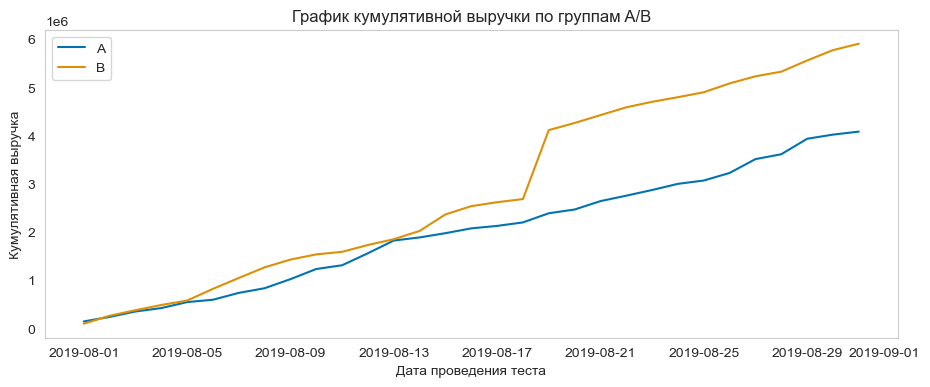

In [218]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']

# выведем график
plt.figure(figsize=(11,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата проведения теста')
plt.title('График кумулятивной выручки по группам A/B')
plt.legend()
plt.grid()
plt.show()

**Выводы по графику кумулятивной выручки по группам A/B**

1. Выручка в обеих тестах растёт с течением времени на протяжении всего теста.
2. Выручка группы А растёт линейно, но не так быстро, как выручка группы В.
3. У группы В с 18-19 августа произошёл скачок выручки. Возможно, это один заказ с высоким чеком. Далее вернёмся к этому вопросу.

### График кумулятивного среднего чека по группам. 

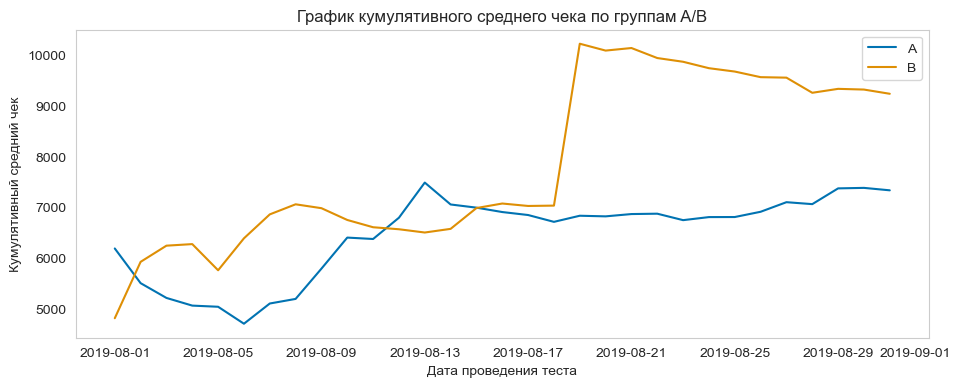

In [216]:
plt.figure(figsize=(11,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.title('График кумулятивного среднего чека по группам A/B')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата проведения теста')
plt.legend()
plt.grid()
plt.show()

**Выводы по графику кумулятивного среднего чека по группам A/B**

1. Кумулятивный средний чек неравномерно растёт в обеих тестах.
2. Первую половину теста значения среднего чека группы А колебались. Заметно падение зачений 6 августа и максимальное значение 13 авугста.
3. После второй половины августа, пройдя половину времени теста значения среднего чека группы А выравниваются.
4. Чек в группе В ведёт себя иначе. Он не имеет резких падений, как чек группы А. Как и нет стабильных показателей значений.
5. Снова 19 августа виден резки скачок среднего чека. Что подтверждает версию с дорогой покупкой.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

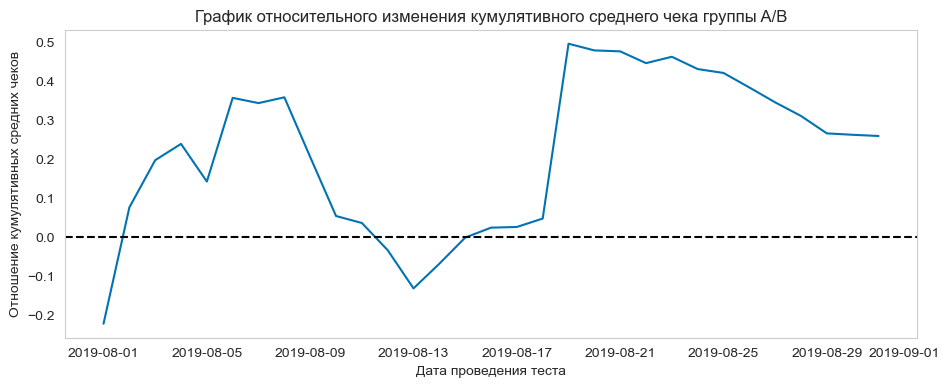

In [226]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11,4))
# построим cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем пунктирную линию оси X (значение оси Y = 0) и оформление
plt.title('График относительного изменения кумулятивного среднего чека группы A/B')
plt.ylabel('Отношение кумулятивных средних чеков')
plt.xlabel('Дата проведения теста')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

**Выводы по графику относительного изменения кумулятивного среднего чека группы A/B**

1. На графике видно, что результаты тестов значительно и очень резко менялись в некоторые даты.
2. Очевидно, что в эти даты были совершены аномальные заказы. Обработаем их на дальнейших шагах.

### График кумулятивного среднего количества заказов на посетителя по группам.

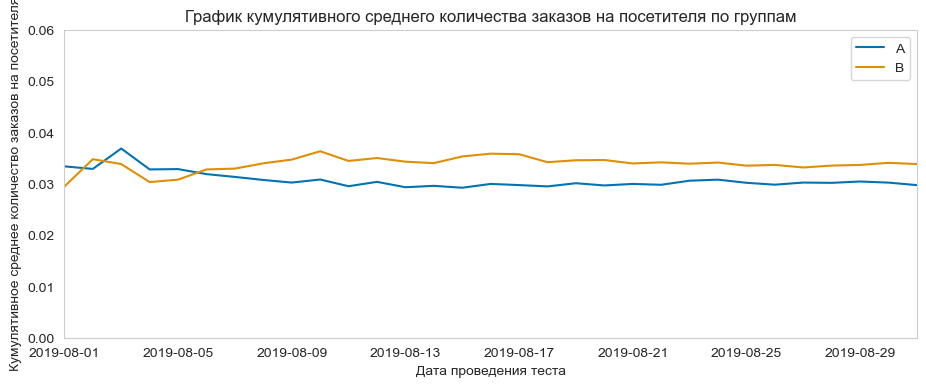

In [228]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize=(11,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата проведения теста')
plt.grid()
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.06])
plt.show()

**Выводы по графику относительного изменения кумулятивного среднего чека группы A/B**

1. Хорошо видно, что после 10 августа количество заказов по группам А и В установилось около своего среднего значения.
2. Почти весь август сегмент В имел большее кумулятивное среднее количество заказов. 
3. При построении графика мы немного изменили масштаб осей, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 3,7%. Если убрать этот масштаб, то будет казаться, что колебания продолжаются и после 10 августа, и среднее количество заказов по группам A/В не установилось около своего среднего значения.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

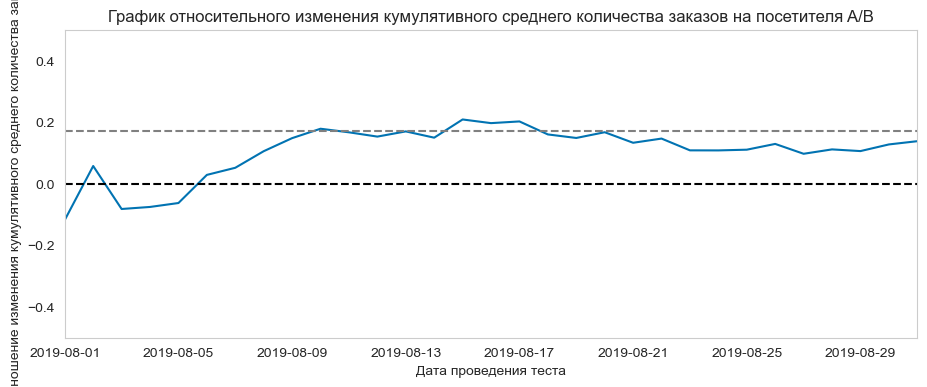

In [236]:
# объединяем таблицы 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададаём размер графика
plt.figure(figsize=(11,4))

# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя A/B')
plt.ylabel('Отношение изменения кумулятивного среднего количества заказов')
plt.xlabel('Дата проведения теста')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.17, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

**Выводы по графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

1. Первые 6 дней группа B отстаёт по метрике.
2. После 6 августа метрика начинает расти становится лучше и лучше.
3. Прирост кумулятивного среднего количества заказов составил примерно 17% относительно группы A. Пиковое значение 20%.

### Построим точечный график количества заказов по пользователям.

Мы помним, что при пострении графиков выше мы наблюдали аномальные заказы,  которые могут искажать результаты A/B-теста. 

Аномалия — такое значение, которое бывает в генеральной совокупности редко, но его попадание в выборку способно внести погрешность. 

1. Сначала построим таблицу `ordersByUsers` с числом заказов по пользователям.
2. Затем перейдём к визальному анализу построим точечную диаграмму.

In [71]:
# снова выведем таблицу заказов. 
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


##### Создадим сводную таблицу с числом заказов по таблице заказов 

In [73]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders',ascending=False)

ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [74]:
# посмотрим список характерных значений
display(ordersByUsers['orders'].describe())

count   1,031.00
mean        1.16
std         0.72
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        11.00
Name: orders, dtype: float64

- В сводной получилась 1 031 строка. По количеству пользователей всё сделали верно.
- Видно, что максимальное количество заказов - 11. При этом, медиана находится на уровне 1. Явно пользователь(ли) с аномальным числом заказов.

##### Построим точечный график количества заказов по пользователям

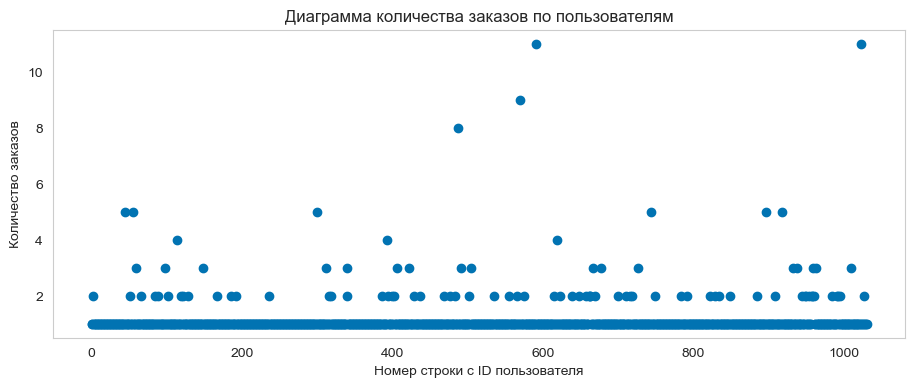

In [238]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(11,4))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Диаграмма количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Номер строки с ID пользователя')
plt.grid()
plt.show()

1. Видно, что есть явно аномальные заказы. По 8, 9 11 заказов.
2. Пользователей, заказавших более двух раз не много. Но они есть. 
3. Видно, что большинство заказали 1 или 2 раза.
4. Пока не понятно 2 заказа — это нормально или много? Поймём это на следующем шаге.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

В исследованиях принять отсеивать от 1% до 5% наблюдений с крайними значениями. 
То есть, наша граница для определения пользователей будет проходить между  95-ым и 99-ым перцентилем.


In [79]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 97.5 , 99])

print('Перцентили:\n95-ый: {}\n97,5-ый: {} \n99-ый: {}' .format(percentiles[0],percentiles[1],percentiles[2]))

Перцентили:
95-ый: 2.0
97,5-ый: 3.0 
99-ый: 4.0


- Больше 2 заказов сделали только 5% пользователей. То есть, «обычный» пользователь нашего интернет-магазина совершает не больше двух заказов за месяц. 
- Всего 1% пользователей сделали больше 4 заказов
- Можем принять границей отсечения 3 заказа и более.

### Точечный график стоимостей заказов.

Посмотрим какие аномалии мы имеем по суммам заказов. 
Визуализируем распредление заказов уже не по количеству, а по стоимости. Но сначала посмотрим список характерных значений.

In [82]:
display(orders['revenue'].describe())

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

- Видно явно заметную продажу за 1 294 500 рублей.
- Видно очень высокое значение стандартного отклонения. Значения в списке отличаются от среднего на 39
- Всё это говорит, что даже до построения графика в наборе данных могут быть серьёзные аномалии или выбросы.  

Но посмотрим визуализацию.

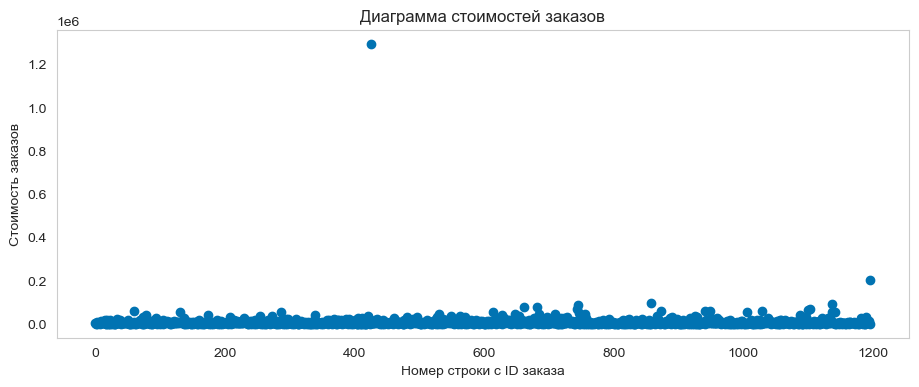

In [240]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(11,4))

plt.scatter(x_values, orders['revenue']) 

plt.title('Диаграмма стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Номер строки с ID заказа')
plt.grid()
plt.show()

Как и ожидали, видно два очень выделящихся заказа:
- заказ стоимостью более 1,2 миллиона рублей
- и заказ стоимость 200 000 рублей.

Отсечём два этих явно аномальных заказа и посмотрим что будет в распредление стоимости заказов менее 200 000 рублей.

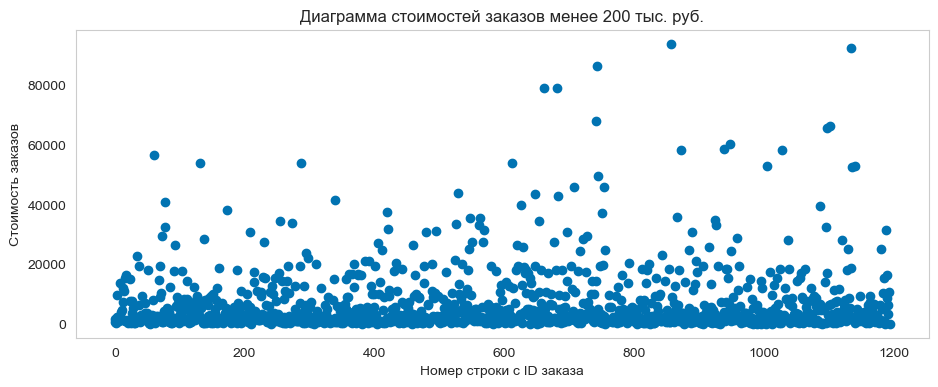

In [242]:
y_values = orders[orders['revenue'] < 200000]['revenue']
x_values = pd.Series(range(0, len(y_values)))

plt.figure(figsize=(11,4))

plt.scatter(x_values, y_values) 

plt.title('Диаграмма стоимостей заказов менее 200 тыс. руб.')
plt.ylabel('Стоимость заказов')
plt.xlabel('Номер строки с ID заказа')
plt.grid()
plt.show()

Видно, что основое число пользователей совершает покупки стоимостью до 20 000 рублей. Но пока не понятно где точно проходит граница отсечения. 

Посмотрим на следующем шаге.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

Определим границы так же, как мы определяли их с количеством заказов на пользователя.

In [89]:
percentiles = np.percentile(orders['revenue'], [95, 99])

print('Перцентили:\n95-ый: {:.1f}\n99-ый: {:.1f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95-ый: 28000.0
99-ый: 58233.2


- Заказы стоиомстью больше 20 000 рублей делают всего 5% пользователей
- При этом, заказы выше 58 000 руб. делает всего 1%
- Примем за границу отсечения заказы выше 36 600 рублей. Так мы отсечём от 1% до 5% наблюдений с крайними значениями.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

На предыдущих этапах мы:
- Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
- Увидели выбросы и нашли границу для их определения.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем нулевую и альтернативную гипотезы. 

- Н0 - Нулевая: различий в среднем количестве заказов между группами нет.
- Н1 - Альтернативная: различия в среднем между группами есть.

Начнём с подготовки данных:

In [93]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [94]:
# посмотрим на информацию о таблице.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  31 non-null     datetime64[ns]
 1   ordersPerDateA        31 non-null     int64         
 2   revenuePerDateA       31 non-null     int64         
 3   ordersPerDateB        31 non-null     int64         
 4   revenuePerDateB       31 non-null     int64         
 5   ordersCummulativeA    31 non-null     int64         
 6   revenueCummulativeA   31 non-null     int64         
 7   ordersCummulativeB    31 non-null     int64         
 8   revenueCummulativeB   31 non-null     int64         
 9   visitorsPerDateA      31 non-null     int64         
 10  visitorsPerDateB      31 non-null     int64         
 11  visitorsCummulativeA  31 non-null     int64         
 12  visitorsCummulativeB  31 non-null     int64         
dtypes: datetime64[ns](1), 

Получили сводную таблицу `data`. Таблица содержит 31 строку по числу дней теста. Посмотрим на названия столбцов:

- `date` — дата проведения теста;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitorId', 'orders']`, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

In [96]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersB.columns = ['visitorId', 'orders']

print('\nКол-во покупателей в группе A:', len(ordersByUsersA))
print('Кол-во покупок в группе А:', ordersByUsersA['orders'].sum())
print('Кол-во посетителей в группе A:', visitors[visitors['group']=='A']['visitors'].sum())

print('\nКол-во покупателей в группе B:', len(ordersByUsersB))
print('Кол-во покупок в группе B:', ordersByUsersB['orders'].sum())
print('Кол-во посетителей в группе B:', visitors[visitors['group']=='B']['visitors'].sum())


Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.


Переменная `sampleA` будет состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']`.
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])`. 

Создадим объект pd.Series нужной длины:

In [98]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                  len(ordersByUsersA['orders'])),name='orders')],axis=0)


sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -
                                                  len(ordersByUsersB['orders'])), name='orders')],axis=0)

"""
применим функцию для проверки гипотезы и вывода относительного прироста,
которую мы создали на предварительном этапе """

statistical_significance(sampleA, sampleB)


Значение p-value: 0.017
Отвергаем нулевую гипотезу: разница статистически значима. Группы А и В разные

Относительный прирост среднего значения группы В к группе А: 13.8%
------------------------------------------


- Значение p-value получилось значительно меньше уровня статистической значимости. 
- Это значит, что мы отвергаем нулевую гипотезу. То есть, разница между средним количеством заказов групп A/B существует.
- Относительный прирост среднего группы В к среднему количеству заказов на посетителя (конверсии) к группе А составил 13,8%

Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
 
 Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
 
- Н0 - Нулевая гипотеза: различий в среднем чеке между группами нет.
- Н1 - Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

А ещё найдём относительные различия в среднем чеке между группами:

In [101]:
sampleA = orders[orders['group']=='A']['revenue']
sampleB = orders[orders['group']=='B']['revenue']

statistical_significance(sampleA, sampleB)


Значение p-value: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего значения группы В к группе А: 25.9%
------------------------------------------


- P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Нет оснований считать, что группы А/В разные.
- Относительное различие среднего чека между сегментами высокое  25.9%.

Надо выяснить, есть ли существенные различия между группами с очищенными данными.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
 
"Очищенные данные" — это значит даннные после удаления аномальных пользователей.

В пунктах выше мы приняли за аномальных пользователей тех, кто:
- совершил от 3 заказов
- или совершил заказ дороже 36 000 рублей.

Таким образом, мы уберём 2.5% пользователей с аномальным числом заказов и 3% пользователей с аномально дорогими заказами.

- Удаляем именно пользователей.
- Сначала определяем аномальные заказы. Делаем срезы `usersWithManyOrders` и `usersWithExpensiveOrders`.
- Затем удалим пользователей, которые их совершили и создадим из них список аномальных `abnormalUsers`. 


In [104]:
# срез по количеству заказам, убираем больше 3
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)

# срез по стоимости заказов, убираем больше 36 000 
usersWithExpensiveOrders = orders[orders['revenue'] > 36000]['visitorId']

# список аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# выведем на печать
print('Первые строки списка пользователей с аномальными заказами:\n', abnormalUsers.head())
print('\nКол-во аномальных пользователей:', len(abnormalUsers))

Первые строки списка пользователей с аномальными заказами:
 1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64

Кол-во аномальных пользователей: 39


Всего 39 пользователей с аномальными заказами. 
- это либо большое количество заказов (больше 3)
- либо дорогие заказы (выше 36 000 руб.)

После удаления пользователей можно посчитать считать статистическую значимость на очищенных данных. Надо выяснить, есть ли существенные различия между группами A/B с очищенными данными.


Создадим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей и выведем: 
- p-value для сравнения среднего между очищенными группами.
- проверку гипотез Н0 и Н1
- относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

In [106]:
# очищенные данные группы А
sampleAFiltered = pd.concat(
    [ordersByUsersA[
        np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),],axis=0,)

# очищенные данные группы В
sampleBFiltered = pd.concat(
    [ordersByUsersB[
        np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),],axis=0,)

statistical_significance(sampleAFiltered, sampleBFiltered)



Значение p-value: 0.013
Отвергаем нулевую гипотезу: разница статистически значима. Группы А и В разные

Относительный прирост среднего значения группы В к группе А: 15.6%
------------------------------------------


- Напомним, что значение p-value для "сырых" данных было 0.017. Разница очень незначительная. Всего 0.004
- Как и в случае с "сырыми" данными мы видим, что разница между средним количеством заказов групп A/B существует.
- Относительный прирост среднего группы B к среднему количеству заказов на посетителя группы A составляет 15.6%. 
- В группе B в среднем на 15.6% выше конверсия сравнению с группой A.


Теперь посмотрим произошло ли что-нибудь с результатами по среднему чеку?

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [109]:
sampleAFiltered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers)) &
                         (orders['group'] == 'A')]['revenue']

sampleBFiltered = orders[
    np.logical_not(orders['visitorId'].isin(abnormalUsers)) & (orders['group'] == 'B')
                         ]['revenue']

statistical_significance(sampleAFiltered, sampleBFiltered)


Значение p-value: 0.843
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего значения группы В к группе А: 3.2%
------------------------------------------


- Как в случае с "сырыми" данными p-value выше уровня статистической значимости. Вырос с 0.729 до 0.843
- Это значит, нет оснований считать, что на "очищенных" данных группы А и В разные. 
- Но относительный прирост среднего чека группы В к группе сильно изменился. С 25.9% до 3.2%. Это значит, что на средний чек группы В действительно повлияли аномальные продажи. 
- При этом, даже после очистки данных средний чек В смотрится чуть предпочтительнее среднего чека А. Хоть эта разница и не велика.


### Решение по результатам теста

Итак, какие результаты мы получили:

##### По графикам кумулятивной выручки, среднего чека и конверсии:

**1. Кумулятивная выручка:**
- росла неравномерно в обеих группах;
- группа В показывала более высокие результаты; 
- На графике группы В был резкий скачок, который получился за счёт аномальных данных. Эти данные мы обработали на дальнейших шагах.

**2. Кумулятивный средний чек:**
- рос неравномерно в обеих группах на протяжении всего времени теста;
- как и с графиком выручки на графике виден резкий скачок среднего чека, который был обработан;
- группа В выглядит предпочительнее.

**3. Кумулятивное среднее количество заказов на посетителя (конверсия)**
- в начале теста имело место колебание конверсии в обеих группах;
- после 10 августа значения обеих групп выровнялись;
- при этом, группа В показала более высокую конверсию.

##### По расчётам статистической разницы среднего чека:

**1. Средний чек по "сырым" данным:**
- статистически значимых различий в среднем чеке по "сырым" данным между группами нет;
- относительный прирост суммы среднего чека группы B к среднему чеку группы A составляет 25.9%. 

**2. Средний чек по "очищенным" данным:**
- даже после удаления выбросов статистически значимых различий в среднем чеке между группами не обнаружено;
- относительный прирост среднего чека группы B к среднему чеку группы A снизился до 3.2%; 
- такое снижение говорит о том, что действительно, были аномалии, но после их удаления лидер не поменялся;

##### По расчётам статистической разницы количестве заказов на пользователя:
**1. Количество заказов на пользователя по "сырым" данным:**
- статистически значимые различия в среднем количестве заказов между группами А и В по «сырым» данным существует;
- относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет 13.8%.


**2. Количество заказов на пользователя по "очищенным" данным:**
- после очистки данных статистически значимые различия в среднем количестве заказов сохранились;
- относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет 15.6%;

##### Вывод:
- разница среднего чека статистически не значима, значит, прироста относительного среднего чека группы В к А нет; 
- разница показателей количества заказов на пользователя до и после очистки данных осталась статистически значимой;
- это значит, что относительный прирост среднего количества заказов не случайный и группа В имеет прирост 15.6% в сравнении с группой В.

Если средний чек группы не изменился, но при этом есть рост конверсии, то значит, что группа В показала прирост выручки. Именно такую задачу мы и ставили целью исследования. 

Мы можем завершить тест и зафиксировать победу группы В.

---

## Выводы и рекомендации.

### Этап знакомства с данными:

- Провели ознакомление с тремя датасетами: 
    - `hypothesis` - информация о выдвинутых гипотезах, 
    - `orders` - данные о заказах интернет-магазина,
    - `visitors` - информация о посещении сайта с разбивкой по дням и по группам теста.
    
- Таблица `hypothesis` содержит данные о 9 гипотезах, а так же оценки: Reach, Impact, Confidence и Effort.

- Таблица `orders` содержит информацию о 1 197 заказах, которые совершил 1 031 уникальный пользователь. Так же в таблице содержится информация о группе теста А/В, ID пользователей, ID транзакций, дате и сумме каждой покупки. 

- Таблица `visitors` содержит 62 строки. По 31 дню каждого теста. В эти дни пользователи заходили на сайт интернет-магазина и совершали заказы. Так же таблица содержит информацию о группе А/В теста и количество пользователей, заходивших на сайт в каждый день теста. 

- Тест проводился с 1 по 31 августа 2019 года. И данные о заказах и данные о визитах совпадают по датам.

- Данные всех таблиц были без пропусков и явных дубликатов. Предобработка коснулась только переименования нескольких столбцов таблицы `hypothesis` и приведения дат к формату `date` в таблицах `orders` и `visitors`.

### Этап приоритизации гипотез.

- Использование фреймворка ICE выявили 4 гипотезы.
    
- Гипотезы получили высокий приоритет за счёт двух высоких значений Impact (Влияние) и Confidence (Уверенность):
    - 8. Запустить акцию, дающую скидку на товар в день рождения;
    - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; 
    - 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
 

- Применение фреймворка RICE выявило другие гипотезы.
- За счёт дополнительного параметра Reach (Охват) на первые места вышли следующие гипотезы:
    - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    - 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
    - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.


- Пересечением обеих методов являются гипотезы 7, 0, 6

### Подготовка к проведению A/B-теста.

- Проверили равномерность распределения входящего трафика между группами.
    - Трафик пользователей в группе А: 18 736
    - Трафик визитов пользователей в группе B: 18 916

- Отличие в количестве визитов пользователей А/В составляет 0.99 %. Что допустимо и мы можем признать корректность распределения входящего трафика.


- В ходе проверки уникальных пользователей с заказами выяснили, что 58 пользователей сделали заказы и в группе А и в группе В.
- Возможно, была ошибка в механизме сплитования. Но возможно, что пользователи действительно воспринимались как разные по каким-то заранее заданным критериям. В любом случае, стоит обратить внимание отдел маркетинга на проведние А/А тестов.
- Доля пересечения таких пользователей 5,6%. Эта доля вписывается в допустимые 5-10%. 
- В целом пользователи с заказами распределись в таком порядке:
    - Уникальных пользователей с заказами в группе A: 503
    - Уникальных пользователей с заказами в группе В: 586
    
    
### Создание функций.
- Задали функцию для проверки гипотезы о равенстве групп data_a / data_b и вывода относительного различия в среднем между группами.
- К ней мы будем обращаться при расчёте статистической значимости и проверке гипотез. 

### Анализ A/B-теста.

**Построили следующие графики:**
- Кумулятивной выручки по группам. Выручка в обеих тестах неравномерно растёт с течением времени. В групе В мы увидели резкий скачок показателей. Эти аномальные значения мы обработали позднее.


- Кумулятивного среднего чека по группам. Кумулятивный средний чек неравномерно растёт в обеих тестах. В группе В снова был виден резкий скачок среднего чека. Что подтвердило версию с дорогой покупкой.


- Относительного изменения кумулятивного среднего чека группы B к группе A. На графике мы увидели, что результаты тестов значительно и очень резко менялись в некоторые даты. Очевидно, что в эти даты были совершены аномальные заказы, которые мы обработали в дальнейшем.


- Кумулятивного среднего количества заказов на посетителя по группам. После 10 августа количество заказов по группам А и В установилось около своего среднего значения. При этом, почти весь август сегмент В имел большее кумулятивное среднее количество заказов.


- Относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Прирост кумулятивного среднего количества заказов группы В составил примерно 17% относительно группы A. Пиковое значение 20%.


**Построили график и посчитали:**

- Точечный график количества заказов по пользователям. На графике явно видно аномальные заказы по 8, 9 11 заказов. Так же увидели, что большинство сделали 1 или 2 раза.


- 95-й и 99-й перцентили количества заказов на пользователя и приняли границей отсечения 3 заказа и более. 

- Точечный график стоимостей заказов. На графике видно, что основое число пользователей совершает покупки стоимостью до 20 000 рублей.


- 95-й и 99-й перцентили стоимости заказов показали, что можно принять за границу отсечения заказы выше 36 600 рублей. Так мы отсекли от 1% до 5% наблюдений с крайними значениями.

**Посчитали статистические значимости различий :**

- В среднем количестве заказов на посетителя между группами по «сырым» данным. Значение p-value = 0,017. Значительно ниже уровня alpha. То есть, разница между средним количеством заказов групп A/B существует. Относительный прирост среднего группы В к среднему количеству заказов на посетителя (конверсии) к группе А составил 13,8%


- В среднем чеке заказа между группами по «сырым» данным.P-value больше 0.05, то есть, статистически значимых отличий в среднем чеке между группами нет. Нет оснований считать, что группы А/В разные. Относительное различие среднего чека между сегментами высокое  25.9%. Но помним, что в группе В есть выбросы, поэтому посмотрели "очищенные" данные.


- В среднем количестве заказов на посетителя между группами по «очищенным» данным. Значение p-value = 0,013. Разница с "сырыми" данными не значительная.Группы А и В статистически разные. Относительный прирост среднего группы B к среднему количеству заказов на посетителя группы A составляет 15.6%.


- В среднем чеке заказа между группами по «очищенным» данным. Значение p-value: 0.843. Разницы между группами А и В нет. Относительный прирост среднего чека группы В к группе сильно изменился. С 25.9% до 3.2%. Это значит, что на средний чек группы В действительно влияли аномальные продажи.

**На основании всех иследований А/В теста:**
- Приняли решение остановить тест и зафиксировать победу группы В. Она дала прирост выручки за счёт увеличения конверсии относительно группы А.

### Рекомендации для отдела маркетинга.

- Обратить внимание на гипотезы: 
    - 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    - 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
    - 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    
- Обратить внимание на работу системы сплитования на этапе А/А теста.

- Среднее количество заказов на пользователя.
    - Изучить факторы, которые помогли группе В увеличить конверсию.
 
----